c:\Users\surva\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\surva\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\surva\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\surva\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\

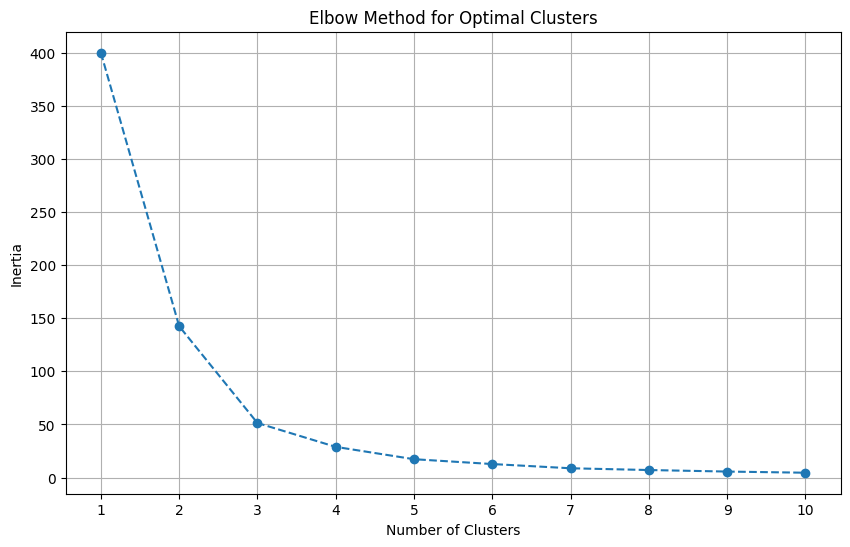

c:\Users\surva\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


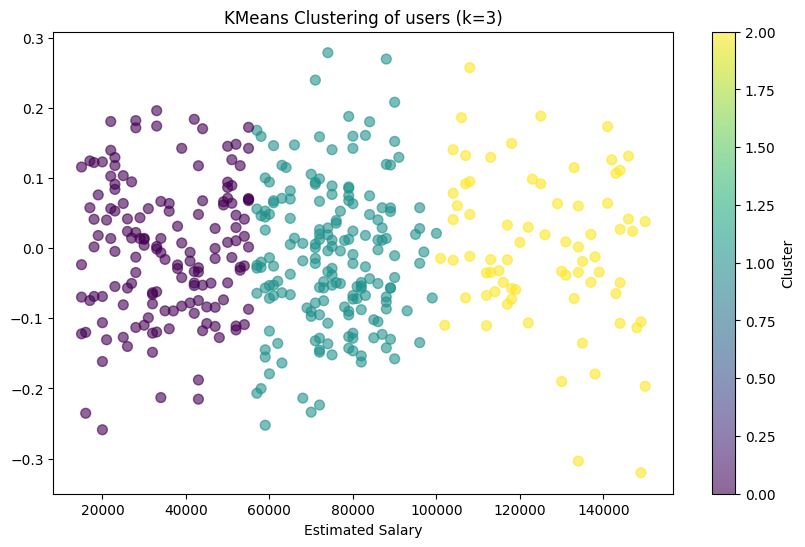

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder

data=pd.read_csv('Social_Network_Ads.csv')

data=data.dropna()

le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

X=data[['EstimatedSalary']]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

inertias=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11),inertias,marker='o',linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()

optimal_clusters=3
kmeans=KMeans(n_clusters=optimal_clusters,random_state=42)
data['Cluster']=kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(data['EstimatedSalary'],np.random.normal(0,0.1,len(data)),c=data['Cluster'],cmap='viridis',s=50,alpha=0.6)
plt.colorbar(label='Cluster')
plt.xlabel('Estimated Salary')
plt.title(f'KMeans Clustering of users (k={optimal_clusters})')
plt.show()

    